![logo](banner.jpg)

<h1><center><span style="color:blue">TASCA 11 - IT Academy</span></center></h1>
<h2><center><span style="color:blue">Curs Data Science</span></center></h2>

In [631]:
import pandas as pd
import numpy as np
from numpy import random
import pandas as pd
from datetime import datetime
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.decomposition import PCA
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_blobs

In [695]:
file = pd.read_csv('Inversion en Publicidad.csv')
file.tail()

,TV,Radio,Social Media,Influencer,Sales
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411
4571,42.0,15.966688,5.046548,Micro,148.202414


In [673]:
file.shape

(4572, 5)

In [674]:
file.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [635]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [636]:
file.describe().round(3)

,TV,Radio,Social Media,Sales
count,4562.000,4568.000,4566.000,4566.000
mean,54.067,18.160,3.324,192.467
std,26.125,9.677,2.213,93.133
min,10.000,0.001,0.000,31.199
25%,32.000,10.526,1.528,112.323
50%,53.000,17.860,3.056,189.231
75%,77.000,25.650,4.808,272.508
max,100.000,48.871,13.982,364.080


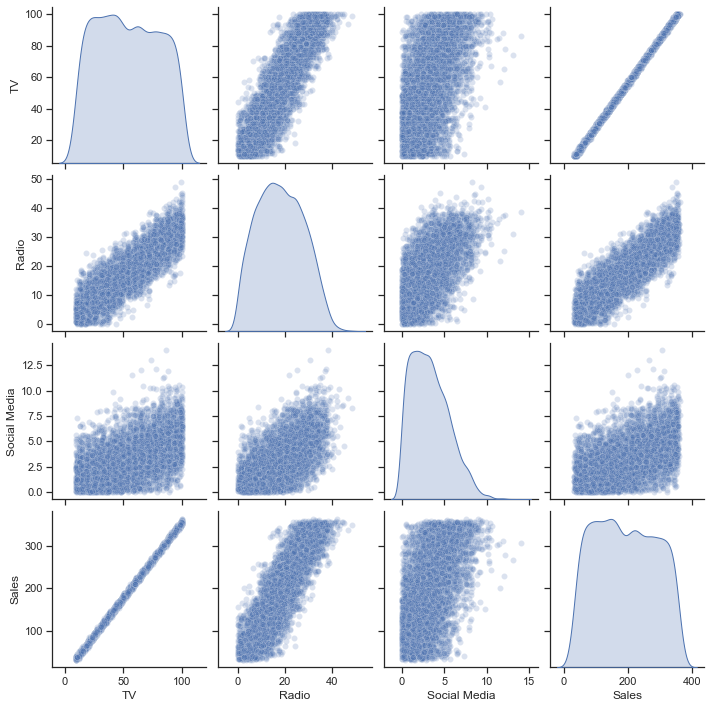

In [637]:
sns.set_theme(style="ticks")
sns.pairplot(file, diag_kind='kde', plot_kws={'alpha': 0.2})
plt.show()

### <span style="color:black">Exercici 1.</span>

__Agafa un conjunt de dades que t'agradi i normalitza els atributs categòrics en dummy. Normalitza els atributs numèrics amb StandardScaler:__ <span style="color:blue">__[X] Fet__</span>

In [638]:
# Vamos a normalizar el atributo categórico 'Influencer' con la función dummy #

In [639]:
#Comprobamos las observaciones que tiene, y constatamos también que no hay ningún valor NAN, ni valores repetidos.

file['Influencer'].unique()
Influencer=file['Influencer'].value_counts().to_frame()
Influencer

,Influencer
Mega,1158
Micro,1153
Nano,1139
Macro,1122


Text(0.5, 0, 'Type of Influencer ')

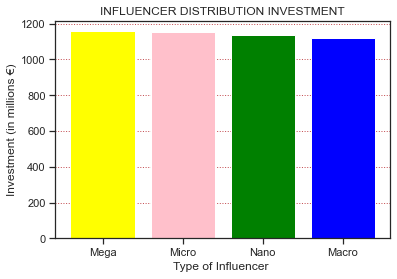

In [640]:
plt.bar(Influencer.index, Influencer['Influencer'], color=['yellow', 'pink', 'green', 'blue', 'cyan'])
plt.grid(axis='y',linestyle='dotted', color='r')
plt.title('INFLUENCER DISTRIBUTION INVESTMENT')
plt.ylabel('Investment (in millions €)')
plt.xlabel('Type of Influencer ')

In [641]:
Influencer_dummy= pd.get_dummies(file["Influencer"])

In [642]:
Influencer_dummy.rename(columns = {'Mega':'Influen_Mega', 'Micro':'Influen_Micro',
                              'Nano':'Influen_Nano', 'Macro':'Influen_Macro'}, inplace = True)

In [643]:
Influencer_dummy.head(3)

,Influen_Macro,Influen_Mega,Influen_Micro,Influen_Nano
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0


In [644]:
file=file.drop('Influencer', axis='columns')
file.head(3)

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829


In [645]:
file_= pd.concat([file, Influencer_dummy], axis=1)
file_.head(3)

,TV,Radio,Social Media,Sales,Influen_Macro,Influen_Mega,Influen_Micro,Influen_Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0


In [646]:
# Ahora vamos a normalizar los atributos numéricos con StandardScaler #

In [647]:
# Vamos a mirar si el resto de columnas tienen valores nulos

total_nan_values = file_.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
TV               10
Radio             4
Social Media      6
Sales             6
Influen_Macro     0
Influen_Mega      0
Influen_Micro     0
Influen_Nano      0
dtype: int64


In [648]:
# Vamos a eliminar los valores NaN del archivo para poder normalizar. 

file_=file_.dropna()

In [649]:
total_nan_values = file_.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
TV               0
Radio            0
Social Media     0
Sales            0
Influen_Macro    0
Influen_Mega     0
Influen_Micro    0
Influen_Nano     0
dtype: int64


In [650]:
from sklearn.preprocessing import StandardScaler

In [651]:
file_ss=file[['TV', 'Radio', 'Social Media', 'Sales']].copy()

In [652]:
ss = StandardScaler()
file_transformed = ss.fit_transform(file_ss)
file_transformed

array([[-1.45726128, -1.19824782, -0.18801669, -1.47905462],
       [-1.57210617, -0.92214596, -0.4132966 , -1.56555173],
       [-0.50022056, -0.2350076 , -0.18556355, -0.45411791],
       ...,
       [-0.38537567,  0.16946399,  0.80103658, -0.30964615],
       [ 0.64822831, -0.06466744, -0.62514259,  0.65659268],
       [-0.46193893, -0.22671468,  0.77859777, -0.4753309 ]])

In [653]:
file_transformed = pd.DataFrame(file_transformed)

In [654]:
file_transformed.head(3)

,0,1,2,3
0,-1.457261,-1.198248,-0.188017,-1.479055
1,-1.572106,-0.922146,-0.413297,-1.565552
2,-0.500221,-0.235008,-0.185564,-0.454118


In [655]:
file_transformed.rename(columns = {0:'TV', 1:'Radio',
                              2:'Social Media', 3:'Sales'}, inplace = True)

In [657]:
file_transformed.head(3)

,TV,Radio,Social Media,Sales
0,-1.457261,-1.198248,-0.188017,-1.479055
1,-1.572106,-0.922146,-0.413297,-1.565552
2,-0.500221,-0.235008,-0.185564,-0.454118


In [658]:
file_ok=file_.drop(['TV', 'Radio', 'Social Media', 'Sales'], axis='columns')

In [659]:
X_scaled= pd.concat([file_ok, file_transformed], axis=1)
X_scaled.head(2)

,Influen_Macro,Influen_Mega,Influen_Micro,Influen_Nano,TV,Radio,Social Media,Sales
0,0.0,1.0,0.0,0.0,-1.457261,-1.198248,-0.188017,-1.479055
1,0.0,1.0,0.0,0.0,-1.572106,-0.922146,-0.413297,-1.565552


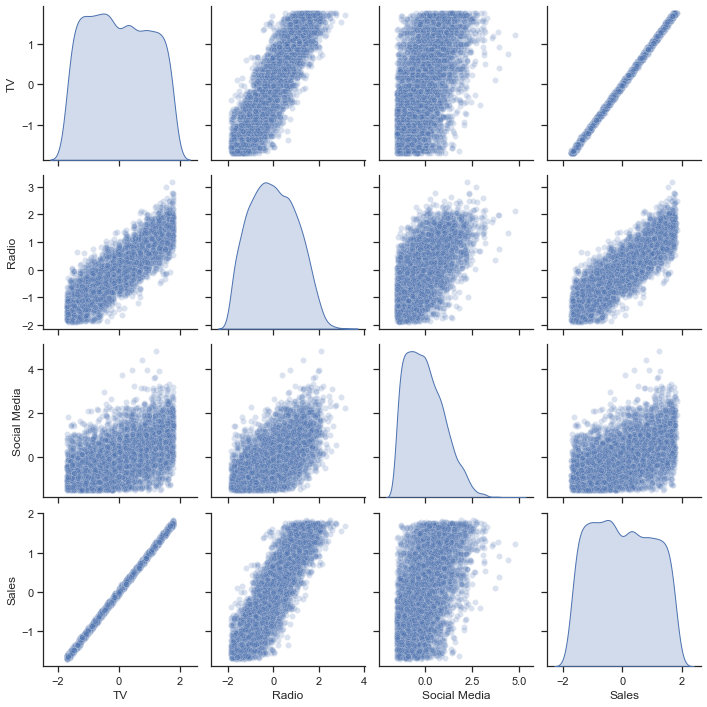

In [660]:
# Si visualizamos las variables de los datos estandarizados, observamos que la relación entre ellas sigue siendo la misma. 

sns.set_theme(style="ticks")
sns.pairplot(file_transformed, diag_kind='kde', plot_kws={'alpha': 0.2})
plt.show()

### <span style="color:black">Exercici 2.</span>

__Continua amb el conjunt de dades de l'exercici anterior i aplica l'anàlisi de components principals (PCA):__ <span style="color:blue">__[X] Fet__</span>

In [731]:
data = pd.read_csv('Inversion en Publicidad.csv')
data.tail(3)

,TV,Radio,Social Media,Influencer,Sales
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411
4571,42.0,15.966688,5.046548,Micro,148.202414


In [732]:
# Comprobamos de nuevo que nuestro archivo normalizado no tenga NaN, en principio, al estar ya escalado, no debería tener.

total_nan_values = data.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64


In [733]:
data_=data.dropna()

In [ ]:
data_['Influencer'] = data['Influencer'].map({'Mega': 1, 'Macro': 0, 'Micro': 2, 'Nano': 3})

In [739]:
data_['Influencer'].value_counts()

1    1152
2    1148
3    1134
0    1112
Name: Influencer, dtype: int64

In [741]:
data_withoutInfl=data_.drop(['Influencer'], axis=1)

In [850]:
#Instanciamos objeto PCA y aplicamos

pca=PCA(n_components=5, svd_solver="auto") 
pca.fit(data_) # Obtenemos los componentes principales
X_pca=pca.transform(data_) # Convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:1]))

# Vemos que con solo 1 componente tenemos algo mas del 99% de varianza explicada

shape of X_pca (4546, 5)
[9.97017754e-01 2.46321413e-03 3.20782541e-04 1.31185302e-04
 6.70644242e-05]
suma: 0.9970177536022096


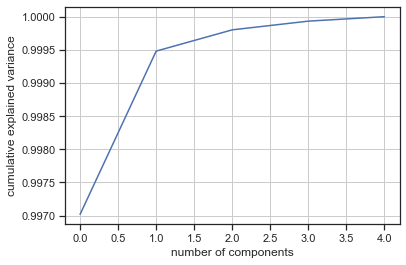

In [846]:
# En esta gráfica de variabilidad explicada acumulada, vemos que tomando solo un componente llegamos al 99%

plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

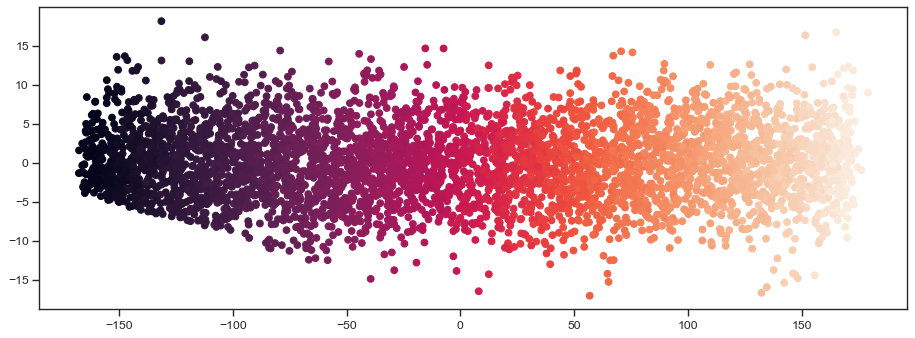

In [868]:
y = data_['TV'].values
x_std = pca.fit_transform(X_pca)

figure(figsize=(14, 5), dpi=80)
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)

In [ ]:
# A contiuación vamos a mostrar un ejemplo donde visualmente queda mucho más clara de aplicación de PCA para reducir el número 
# de variables y conseguir así ser mas eficientes. 

In [ ]:
# Vamos a generar los datos de una entidad bancaria con 15.000 variables de cada cliente (aunque parezaca increíble, 
# un banco puede llegar a tener esta información sobre nosotros) y vamos a analizar a los 9.000 clientes que tiene en Cuenca.
# A partir del dataset queremos representar los distintos segmentos de clientes que tenemos, pero representar 15.000
# en 2D es imposible, utilizamos PCA para reducir las 15.000 dimensiones a 4.

In [875]:
bank = make_blobs(n_features=15000, n_samples=9000, centers=4,  cluster_std=40, random_state=2018)
print(bank[0].shape)

(9000, 15000)


In [881]:
pca = PCA(n_components=3, svd_solver="auto")
results = pca.fit_transform(bank[0])
print(results.shape)

(9000, 3)


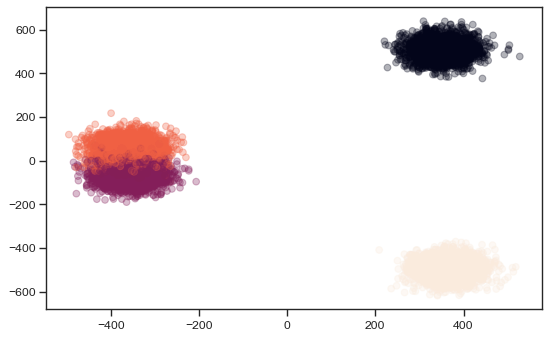

In [882]:
# Visualizamos los segmentos y podemos ver como tenemos claramente que hay cuatro tipos de clientes distintos, dos tipos 
# muy claramente definidos (negro y rosa) y luego el segmento naranja y lila muy cercanos, por lo que podría haber una 
# transferencia de preferencias entre ellos.

figure(figsize=(8, 5), dpi=80)
plt.scatter(results[:, 0], results[:, 1], c=bank[1], alpha=0.3)

### <span style="color:black">Exercici 3.</span>

__Continua amb el conjunt de dades que estaves fent servir fins ara i normalitza les dades tenint en compte els outliers.:__ <span style="color:blue">__[X] Fet__</span>

(array([1, 2, 3, 4]),
 [Text(1, 0, 'TV'),
  Text(2, 0, 'Radio'),
  Text(3, 0, 'Social Media'),
  Text(4, 0, 'Sales')])

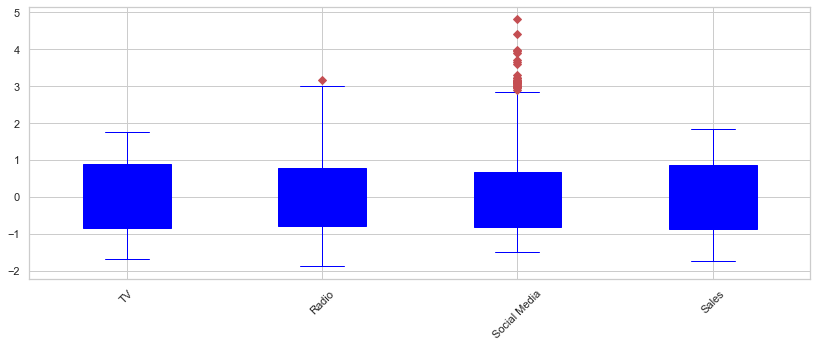

In [545]:
plt.subplots(figsize=(14,5))
file_transformed.boxplot(patch_artist=True, color='blue', sym='rD')
plt.xticks(rotation=45)

In [533]:
file_transformed.shape

(4572, 4)

In [534]:
# Vemos si hay valores nulos. 

total_nan_values = file.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
TV              0
Radio           0
Social Media    0
Sales           0
dtype: int64


In [535]:
# Esta vez voy a utilizar el método TUKEY para detectar los outliers.
# El límite lo establecemos en 1,5 veces el rango intercuartil (IQR)

X=file[['Radio','Social Media']]

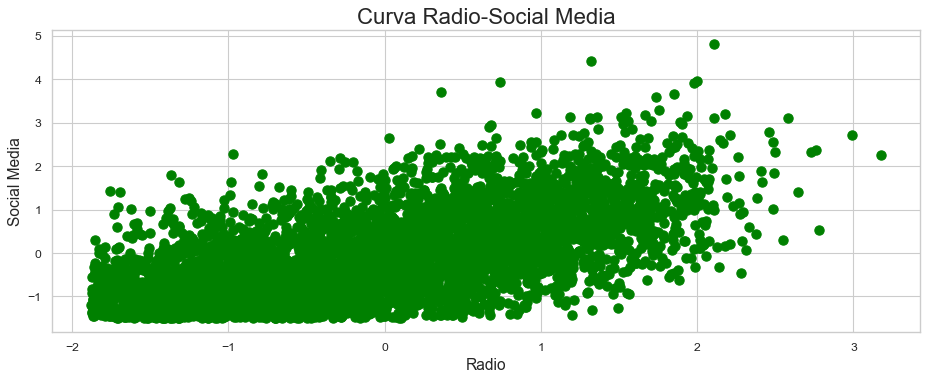

In [536]:
# Representación gráfica de las variables con outliers: vemos que a partir del 2.5 aproximadamente, tanto en el eje X como el Y,
# hay bastantes outliers, así que vamos a detectarlos y a eliminarlos. 

f1 = X['Radio'].values
f2 = X['Social Media'].values

# Representamos gráficamente.
figure(figsize=(14, 5), dpi=80)
plt.scatter(f1, f2, s=70, color='green')
plt.xlabel("Radio", size=14)
plt.ylabel("Social Media", size=14)
plt.title("Curva Radio-Social Media", size=20)
plt.show()

In [537]:
# Primer normalizamos el nuevo dataset creado, que hemos llamado X

mms=preprocessing.MinMaxScaler() 
Xn=mms.fit_transform(X)

In [538]:
print(Xn.min(axis=0))
print(Xn.max(axis=0))

[0. 0.]
[1. 1.]


In [539]:
print(Xn.std(axis=0))

[0.1977103  0.15813683]


In [540]:
df_normalizado = pd.DataFrame(Xn) 
df_normalizado = df_normalizado.rename(columns = {0: 'Radio', 1: 'Social Media'})
df_normalizado.head(3)

,Radio,Social Media
0,0.134346,0.207984
1,0.189011,0.172336
2,0.325058,0.208372


In [541]:
#Aplicamos ahora el algoritmo DBScan sobre el dataset normalizado, con unos parámetros "a ojo"

dbscan = DBSCAN(eps=0.08, min_samples = 5, metric = "euclidean").fit(df_normalizado)
clusters = dbscan.fit_predict(df_normalizado)
list(clusters).count(-1)

6

Text(0, 0.5, 'Social Media')

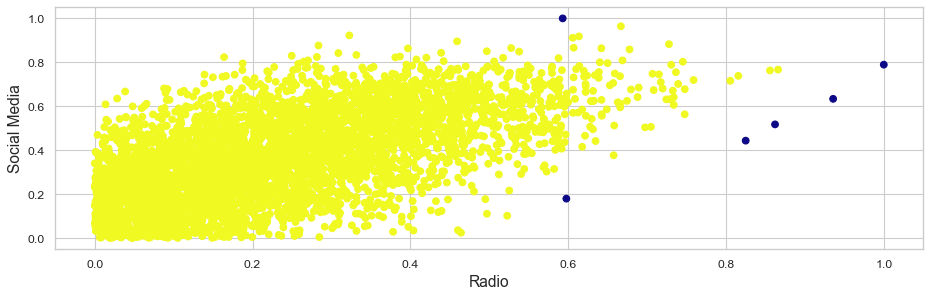

In [542]:
# Graficación de los clústers. Vemos que a creado dos grupos: el amarillo que corresponde al núcleo denso de la nube de puntos 
# y el azul oscuro, que coge los puntos más alejados de ésta nube central (los clusters que nos daba el algoritmo DBScan).

figure(figsize=(14, 4), dpi=80)
df_values = df_normalizado.values
plt.scatter(df_values[:, 1], df_values[:, 0], c=clusters, cmap="plasma")
plt.xlabel("Radio", size=14)
plt.ylabel("Social Media", size=14)

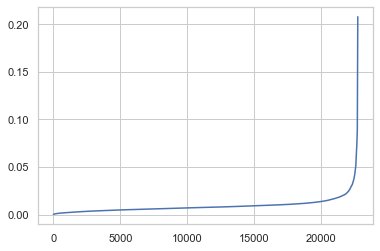

In [462]:
# Parametrización de DBSCAN: Como hemos seleccionado el eps "a ojo", vamos a tratar afinar los parámetros de forma 
# precisa utilizando la técnica del codo, también conocida como la famosa curva elbow. Según el gráfico, de forma aproximada, 
# podemos fijar el valor del radio epsilon en algo menos de 0.025, que es donde la curva comienza a crecer de forma exponencial.

estimator = PCA (n_components =2)
X_pca = estimator.fit_transform(df_normalizado)
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(X_pca)
minPts  = 5 # Fijamos el parámetro minPts
A = kneighbors_graph(X_pca, minPts, include_self=False)
Ar = A.toarray()
seq = []
for i,s in enumerate(X_pca):
    for j in range(len(X_pca)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
seq.sort()
plt.plot(seq)
plt.show()

In [591]:
# Ejecutamos DBSCAN con los nuevos parámetros.

dbscan = DBSCAN(eps=0.0232, min_samples = 5, metric = "euclidean").fit(df_normalizado)
clusters = dbscan.fit_predict(df_normalizado)

Text(0, 0.5, 'Social Media')

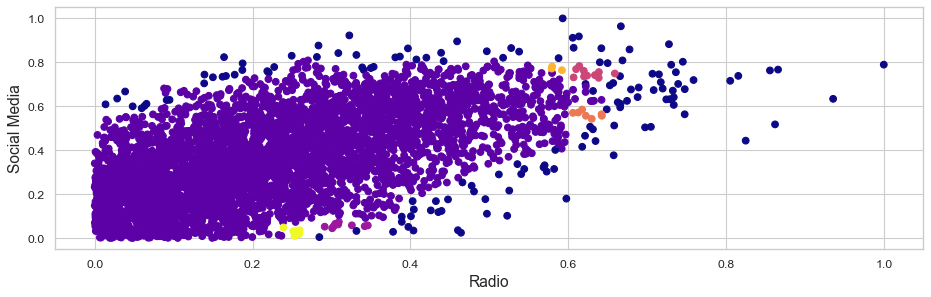

In [592]:
# Graficamos los clústers

figure(figsize=(14, 4), dpi=80)
df_values=df_normalizado.values
plt.scatter(df_values[:, 1], df_values[:, 0], c=clusters, cmap="plasma")
plt.xlabel("Radio", size=14)
plt.ylabel("Social Media", size=14)

In [593]:
# Vemos cuántos valores tiene cada uno de los clusters: los outliers son los que tienen la etiqueta -1

copy = pd.DataFrame()
copy["Radio"]=file["Radio"].values
copy["Social Media"]=file["Social Media"].values
copy['Label'] = clusters;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['Cantidad']=copy.groupby('Label').size()
cantidadGrupo

,Cantidad
Label,
-1,136
0,4375
1,9
2,10
3,7
4,3
5,6


In [594]:
# Eliminamos los puntos marcados como outliers 

copy = copy.drop(copy[copy['Label'] == -1].index)

In [595]:
# Eliminamos la columna Label una vez hecho el filtro anterior

copy=copy.drop('Label', axis=1)

(array([1, 2]), [Text(1, 0, 'Radio'), Text(2, 0, 'Social Media')])

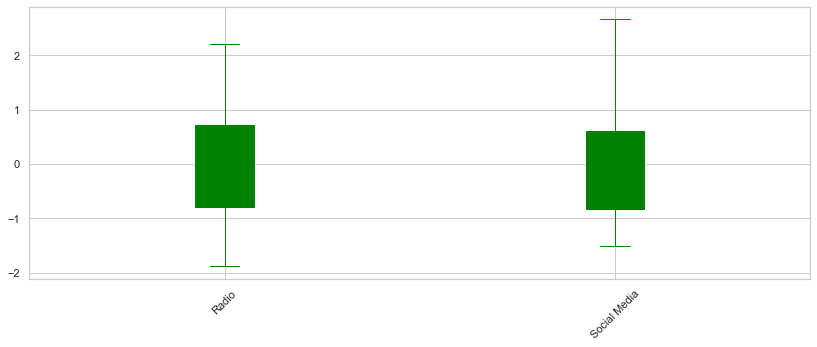

In [596]:
# En el gráfico vemos ambas variables ya no hay outliers

plt.subplots(figsize=(14, 5))
copy.boxplot(patch_artist=True, color='green', sym='rD')
plt.xticks(rotation=45)

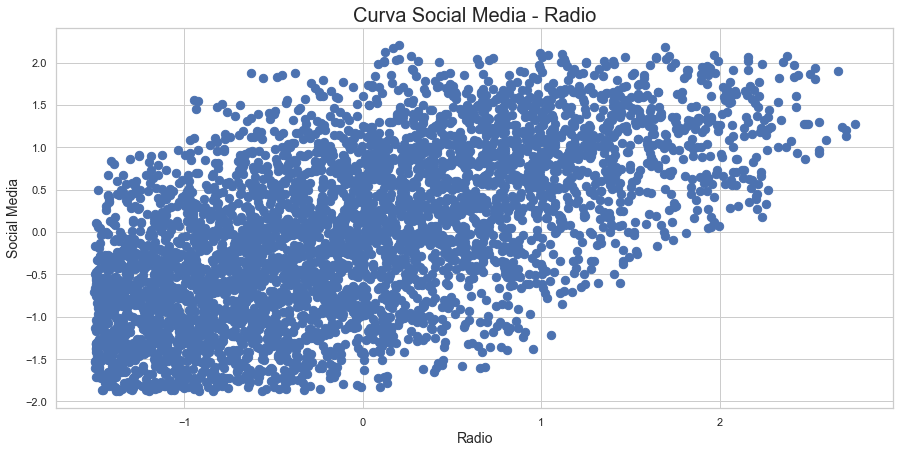

In [527]:
# Gráfica del dataframe "limpio"

f1 = copy["Social Media"].values
f2 = copy['Radio'].values

plt.subplots(figsize=(15, 7))
plt.scatter(f1, f2, s=70)
plt.xlabel("Radio", size=14)
plt.ylabel("Social Media", size=14)
plt.title("Curva Social Media - Radio", size=20)
plt.show()